# Imports

In [1]:
%load_ext autoreload

In [11]:
%autoreload 2
from src import *
import numpy as np

# Signal

In [36]:
dim = (32, 32)

# Sparse signal parameters
sparse_range = (2, 6)
density = 0.005

# Smooth signal parameters
smooth_range = (0, 2)
sigmas_range = (2e-2, 2e-1)
nb_gaussian = 100

# Seed
seed = None
np.random.seed(seed)

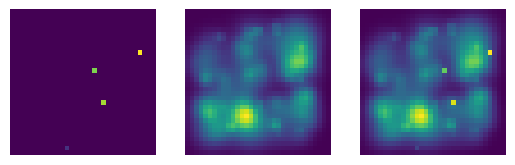

In [37]:
sparse_signal = compute_sparse(dim, sparse_range, density, seed)
smooth_signal = compute_smooth(dim, smooth_range, sigmas_range, nb_gaussian)

signal = sparse_signal + smooth_signal 
plot_signal(sparse_signal,smooth_signal,signal)

# Operator $\phi$

In [43]:
L = 1
theta = 0.5
phi = non_uni_FFT(dim, L, theta)

x0 = signal.ravel()
y0 = pxu.view_as_complex(phi.apply(x0))

pnsr = np.inf
y = compute_y(y0, pnsr)

# Solver

In [44]:
# Loss weights
lambda1 = 0
lambda2 = 0

x1,x2 = solve(y, phi, lambda1, lambda2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyxu/abc/arithmetic.py:639: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t2 = float(self._op.apply(self._cst))


INFO -- [2023-10-02 11:53:58.632952] Iteration 0
	iteration: 0
	RelError[x]: 0.0
INFO -- [2023-10-02 11:53:58.867107] Iteration 50
	iteration: 50
	RelError[x]: 0.00793565747471177
INFO -- [2023-10-02 11:53:59.058844] Iteration 100
	iteration: 100
	RelError[x]: 0.0015594259341985253
INFO -- [2023-10-02 11:53:59.274615] Iteration 150
	iteration: 150
	RelError[x]: 0.00048416210033395496
INFO -- [2023-10-02 11:53:59.464840] Iteration 200
	iteration: 200
	RelError[x]: 0.0002508863362376177
INFO -- [2023-10-02 11:53:59.749345] Iteration 250
	iteration: 250
	RelError[x]: 0.00015782661621739709
INFO -- [2023-10-02 11:54:00.010339] Iteration 300
	iteration: 300
	RelError[x]: 0.00011035474332139519
INFO -- [2023-10-02 11:54:00.096944] Iteration 316
	iteration: 316
	RelError[x]: 9.997665035275699e-05
INFO -- [2023-10-02 11:54:00.098299] Stopping Criterion satisfied -> END


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x14f8cb160>


116.28752563506507


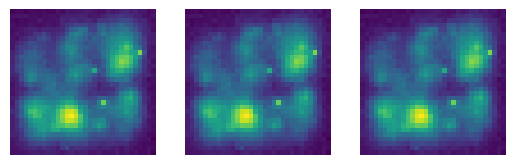

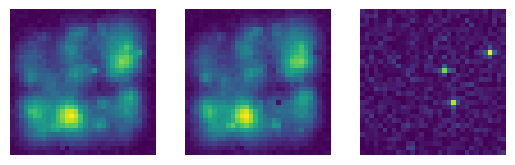

In [48]:
sparse_rcstr, smooth_rcstr, signal_rcstr = map(
    lambda x: x.reshape(dim), (x1, x2, x1 + x2)
)
plot_signal(sparse_rcstr, smooth_rcstr, signal_rcstr)
plot_signal(
    np.abs(sparse_rcstr - sparse_signal),
    np.abs(smooth_rcstr - smooth_signal),
    np.abs(signal_rcstr - signal),
)
print(np.abs(signal_rcstr - signal).sum())